In [1]:
import cv2
import os
import PIL
import skimage
from skimage import data
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import random
from random import randint
import tensorflow as tf
from scipy import ndimage, misc


/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
def load_data(data_directory):
    directories = [d for d in os.listdir(data_directory) 
                   if os.path.isdir(os.path.join(data_directory, d))]
    labels = []
    images = []
    image_name=[]
    for d in directories:
        label_directory = os.path.join(data_directory, d)
        file_names = [os.path.join(label_directory, f) 
                      for f in os.listdir(label_directory) if f.endswith(".jpg")]
        for f in file_names:
            images.append(skimage.data.imread(f))
            labels.append(str(d))
            image_name.append(str(f))
    return images, labels,image_name

In [3]:
ROOT_PATH = '/home/tang/targa/exp4/size48*24/'

train_data_directory = os.path.join(ROOT_PATH, "train")
test_data_directory = os.path.join(ROOT_PATH, "test")
validation_data_directory = os.path.join(ROOT_PATH,'validation')
total_data_directory = os.path.join(ROOT_PATH, "total_data")

In [4]:
#os.listdir(total_data_directory+'/0')

In [5]:
Images,Labels,Image_names = load_data(total_data_directory)

In [6]:
os.path.basename(Image_names[0])

'J_sheared__0099.jpg'

In [7]:
Image_names[7]

'/home/tang/targa/exp4/size48*24/total_data/J/J_gaussian_sigma_0.141.jpg'

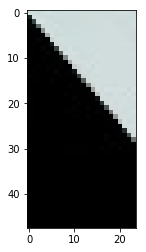

In [8]:
plt.imshow(Images[0])

In [9]:
Labels[0]

'J'

In [10]:
len(Labels)

24594

In [11]:
#########define percentage of dataset
total_number = len(Labels)
train_number = int(total_number*0.8)
test_number = int(total_number*0.1)
validation_number = total_number-train_number-test_number

In [12]:
print('- Training-set:\t\t{}'.format(train_number))
print('- Test-set:\t\t{}'.format(test_number))
print('- Validation-set:\t{}'.format(validation_number))

- Training-set:		19675
- Test-set:		2459
- Validation-set:	2460


In [13]:
from random import sample


In [14]:
totalset_index = []
trainset_index = []
testset_index=[]
validationset_index=[]


In [15]:
#########generate total images index
for i in range(0,len(Labels)):
    totalset_index.append(str(i))

In [16]:
trainset_index = sample(totalset_index,train_number)

In [17]:
print('- Total-set index length:\t{}'.format(len(totalset_index)))
print('- Training-set index length:\t\t{}'.format(len(trainset_index)))
print('- Testing-set index length:\t\t{}'.format(len(testset_index)))
print('- Validation-set index length:\t{}'.format(len(validationset_index)))

- Total-set index length:	24594
- Training-set index length:		19675
- Testing-set index length:		0
- Validation-set index length:	0


In [18]:
for i in trainset_index:
    filename = train_data_directory+'/'+Labels[int(i)]+'/'+os.path.basename(Image_names[int(i)])
    plt.imsave(filename,Images[int(i)])
    #print(filename)
    totalset_index.remove(i)

In [19]:
print('- Total-set index length:\t{}'.format(len(totalset_index)))
print('- Training-set index length:\t\t{}'.format(len(trainset_index)))
print('- Testing-set index length:\t\t{}'.format(len(testset_index)))
print('- Validation-set index length:\t{}'.format(len(validationset_index)))

- Total-set index length:	4919
- Training-set index length:		19675
- Testing-set index length:		0
- Validation-set index length:	0


In [20]:
testset_index= sample(totalset_index,test_number)

In [21]:
for i in testset_index:
    filename = test_data_directory+'/'+Labels[int(i)]+'/'+os.path.basename(Image_names[int(i)])
    plt.imsave(filename,Images[int(i)])
    #print(filename)
    totalset_index.remove(i)
 

In [22]:
print('- Total-set index length:\t{}'.format(len(totalset_index)))
print('- Training-set index length:\t\t{}'.format(len(trainset_index)))
print('- Testing-set index length:\t\t{}'.format(len(testset_index)))
print('- Validation-set index length:\t{}'.format(len(validationset_index)))

- Total-set index length:	2460
- Training-set index length:		19675
- Testing-set index length:		2459
- Validation-set index length:	0


In [23]:
validationset_index= sample(totalset_index,validation_number)

In [24]:
for i in validationset_index:
    filename = validation_data_directory+'/'+Labels[int(i)]+'/'+os.path.basename(Image_names[int(i)])
    plt.imsave(filename,Images[int(i)])
    #print(filename)
    totalset_index.remove(i)

In [25]:
print('- Total-set index length:\t{}'.format(len(totalset_index)))
print('- Training-set index length:\t\t{}'.format(len(trainset_index)))
print('- Testing-set index length:\t\t{}'.format(len(testset_index)))
print('- Validation-set index length:\t{}'.format(len(validationset_index)))

- Total-set index length:	0
- Training-set index length:		19675
- Testing-set index length:		2459
- Validation-set index length:	2460
